Looking for some examples on how to use docTR for OCR-related tasks? You've come to the right place 😀

# Installation

Install all the dependencies to make the most out of docTR. The project provides two main [installation](https://mindee.github.io/doctr/latest/installing.html) streams: one for stable release, and developer mode.

## Latest stable release

This will install the last stable release that was published by our teams on pypi. It is expected to provide a clean and non-buggy experience for all users.

In [1]:
# TensorFlow
# !pip install python-doctr[tf,viz]

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## From source

Before being staged for a stable release, we constantly iterate on the community feedback to improve the library. Bug fixes and performance improvements are regularly pushed to the project Git repository. Using this installation method, you will access all the latest features that have not yet made their way to a pypi release!

In [ ]:
# Install the most up-to-date version from GitHub

# TensorFlow
# !pip install python-doctr[tf,viz]@git+https://github.com/mindee/doctr.git

# PyTorch
# First we have to uninstall the preinstalled tensorflow version if we want to work with PyTorch as backend
# because the env variables USE_TORCH=1 / USE_TF=1 doesn't have an effect in Colab
!pip uninstall -y tensorflow
!pip install python-doctr[torch,viz]@git+https://github.com/mindee/doctr.git

# Basic usage

We're going to review the main features of docTR 🎁
And for you to have a proper overview of its capabilities, we will need some free fonts for a proper output visualization:

In [2]:
# Install some free fonts for result rendering
!sudo apt-get install fonts-freefont-ttf -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-freefont-ttf
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 2,388 kB of archives.
After this operation, 6,653 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-freefont-ttf all 20120503-10build1 [2,388 kB]
Fetched 2,388 kB in 1s (3,189 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-freefont-ttf.
(Reading databa

Let's take care of all the imports directly

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

For the next steps, we will need a proper PDF document that will be used to showcase the library features

In [4]:
# Download a sample
!wget https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
# Read the file
doc = DocumentFile.from_pdf("Cash-Payment-Receipt-Template.pdf")
print(f"Number of pages: {len(doc)}")

--2025-03-26 20:54:07--  https://eforms.com/download/2019/01/Cash-Payment-Receipt-Template.pdf
Resolving eforms.com (eforms.com)... 104.26.0.24, 104.26.1.24, 172.67.73.188, ...
Connecting to eforms.com (eforms.com)|104.26.0.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16080 (16K) [application/pdf]
Saving to: ‘Cash-Payment-Receipt-Template.pdf’

Cash-Payment-Receip 100%[===================>]  15.70K  --.-KB/s    in 0s      

2025-03-26 20:54:07 (41.6 MB/s) - ‘Cash-Payment-Receipt-Template.pdf’ saved [16080/16080]

Number of pages: 1


docTR is, under the hood, running Deep Learning models to perform the different tasks it supports. Those models were built and trained with very popular frameworks for maximum compatibility (you will be pleased to know that you can switch from [PyTorch](https://pytorch.org/) to [TensorFlow](https://www.tensorflow.org/) without noticing any difference for you). By default, our high-level API sets the best default values so that you get high performing models without having to know anything about it. All of this is wrapper in a `Predictor` object, which will take care of pre-processing, model inference and post-processing for you ⚡

Let's instantiate one!

In [13]:
doc = DocumentFile.from_pdf("/content/2024-AZ-OMY-Registration-License.pdf")

In [5]:
# Instantiate a pretrained model
predictor = ocr_predictor(pretrained=True)

  0%|          | 0/65814772 [00:00<?, ?it/s]

  0%|          | 0/63286381 [00:00<?, ?it/s]

By default, PyTorch model provides a nice visual description of a model, which is handy when it comes to debugging or knowing what you just created. We also added a similar feature for TensorFlow backend so that you don't miss on this nice assistance.

Let's dive into this model 🕵

In [14]:
# Display the architecture
print(predictor)

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): FAST()
  )
  (reco_predictor): RecognitionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(32, 128), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=False)
      (normalize): Normalize(mean=(0.694, 0.695, 0.693), std=(0.299, 0.296, 0.301))
    )
    (model): CRNN(
      (feat_extractor): Sequential(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(64, eps=1e-05, momentum=

Here we are inspecting the most complex (and high-level) object of docTR API: an OCR predictor. Since docTR achieves Optical Character Recognition by first localizing textual elements (Text Detection), then extracting the corresponding text from each location (Text Recognition), the OCR Predictor wraps two sub-predictors: one for text detection, and the other for text recognition.

## Basic inference

It looks quite complex, isn't it?
Well that will not prevent you from easily get nice results. See for yourself:

In [15]:
result = predictor(doc)

## Prediction visualization

If you rightfully prefer to see the results with your eyes, docTR includes a few visualization features. We will first overlay our predictions on the original document:

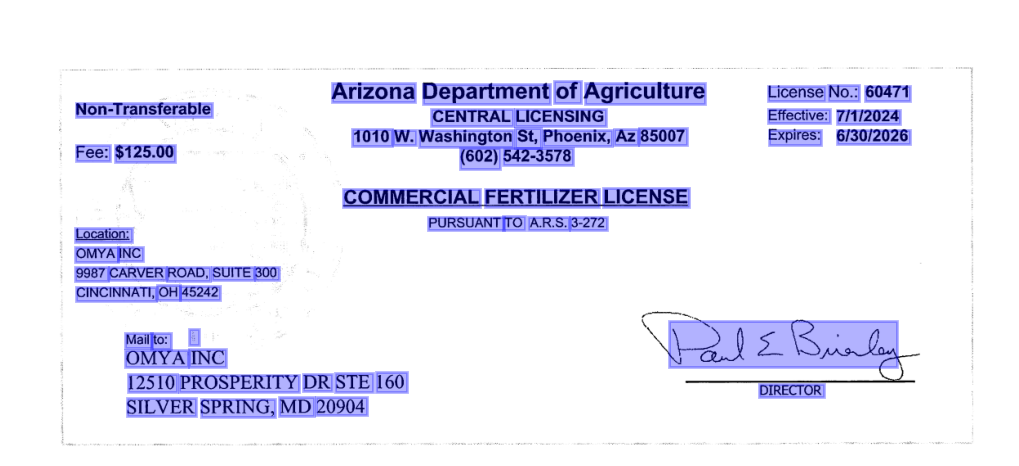

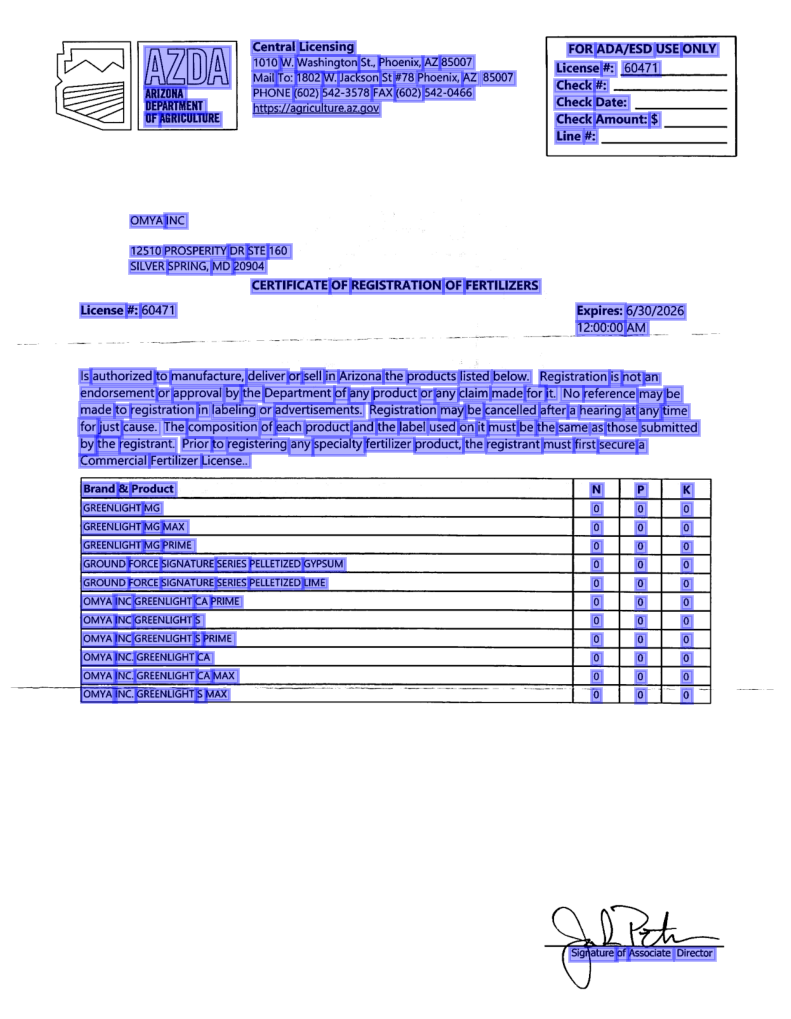

In [16]:
result.show()

Looks accurate!
But we can go further: if the extracted information is correctly structured, we should be able to recreate the page entirely. So let's do this 🎨

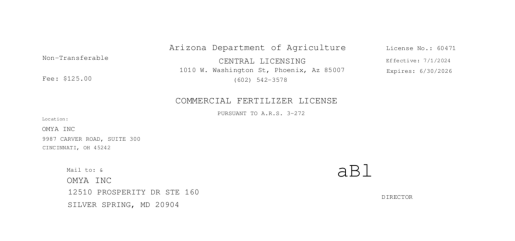

In [17]:
synthetic_pages = result.synthesize()
plt.imshow(synthetic_pages[0]); plt.axis('off'); plt.show()

## Exporting results

OK, so the predictions are relevant, but how would you integrate this into your own document processing pipeline? Perhaps you're not using Python at all?

Well, if you happen to be using JSON or XML exports, they are already supported 🤗

In [18]:
# JSON export
json_export = result.export()
print(json_export)

{'pages': [{'page_idx': 0, 'dimensions': (546, 1224), 'orientation': {'value': None, 'confidence': None}, 'language': {'value': None, 'confidence': None}, 'blocks': [{'geometry': ((np.float64(0.064453125), np.float64(0.15848214285714285)), (np.float64(0.8994140625), np.float64(0.9115728021978022))), 'objectness_score': 0.8050841729519731, 'lines': [{'geometry': ((np.float64(0.3212890625), np.float64(0.15848214285714285)), (np.float64(0.6943359375), np.float64(0.21102335164835168))), 'objectness_score': 0.8035270124673843, 'words': [{'value': 'Arizona', 'confidence': 0.9999805688858032, 'geometry': ((np.float64(0.3212890625), np.float64(0.16286057692307693)), (np.float64(0.404296875), np.float64(0.20445570054945056))), 'objectness_score': 0.7824288606643677, 'crop_orientation': {'value': 0, 'confidence': None}}, {'value': 'Department', 'confidence': 0.7365492582321167, 'geometry': ((np.float64(0.4130859375), np.float64(0.16504979395604397)), (np.float64(0.5400390625), np.float64(0.21102

In [19]:
# XML export
xml_output = result.export_as_xml()
print(xml_output[0][0])

b'<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en"><head><title>docTR - XML export (hOCR)</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta name="ocr-system" content="python-doctr v0.11.0" /><meta name="ocr-capabilities" content="ocr_page ocr_carea ocr_par ocr_line ocrx_word" /></head><body><div class="ocr_page" id="page_1" title="image; bbox 0 0 1224 546; ppageno 0" /><div class="ocr_carea" id="block_1" title="bbox 79 87                     1101 498"><p class="ocr_par" id="par_1" title="bbox 79 87                     1101 498"><span class="ocr_line" id="line_1" title="bbox 393 87                         850 115;                         baseline 0 0; x_size 0; x_descenders 0; x_ascenders 0"><span class="ocrx_word" id="word_1" title="bbox 393 89                             495 112;                             x_wconf 100">Arizona</span><span class="ocrx_word" id="word_2" title="bbox 506 90                             661 115;                      

Or if you only need the extracted plain text

In [20]:
string_result = result.render()
print(string_result)

Arizona Department of Agriculture
License No.: 60471
Non-Transferable
CENTRAL LICENSING
Effective: 7/1/2024
1010 W. Washington St, Phoenix, Az 85007
Expires: 6/30/2026
Fee: $125.00
(602) 542-3578
COMMERCIAL FERTILIZER LICENSE
PURSUANT TO A.R.S. 3-272
Location:
OMYA INC
9987 CARVER ROAD, SUITE 300
CINCINNATI, OH 45242
Mail to: &
OMYA INC
aBl
12510 PROSPERITY DR STE 160
DIRECTOR
SILVER SPRING, MD 20904



Central Licensing
FOR ADA/ESD USE ONLY
1010 W. Washington St., Phoenix, AZ 85007
License #: 60471
Mail To: 1802 W. Jackson St #78 Phoenix, AZ 85007
AZDA
Check #:
ARIZONA
PHONE (602) 542-3578 FAX (602) 542-0466
DEPARTMENT
htps/agricutureazox
Check Date:
OF AGRICULTURE
Check Amount: $
Line #:
OMYA INC
12510 PROSPERITY DR STE 160
SILVER SPRING, MD: 20904
CERTIFICATE OF REGISTRATION OF FERTILIZERS
License #: 60471
Expires: 6/30/2026
12:00:00 AM
Is authorized to manufacture, deliver or sell in Arizona the products listed below. Registration is not an
endorsement or approval by the Department

In [ ]:
from google.colab import drive
drive.mount('/content/drive')